In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import thư viện**

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

**Import ảnh**

In [3]:
img = imread('/content/drive/MyDrive/Phân tích số liệu/Image/Input_pic.jpg')
img_size = img.shape
img_size

(168, 300, 3)

**Định hình lại hình ảnh thành 2D. Áp dụng thuật toán K-Means cho ảnh và coi mọi pixel là điểm dữ liệu để chọn màu sẽ sử dụng. Điều này có nghĩa là định hình lại hình ảnh từ chiều cao x chiều rộng x kênh thành (chiều cao X chiều rộng) x kênh; chúng ta sẽ có 168 x 300 = 50400 điểm dữ liệu.**

In [4]:
X = img.reshape(img_size[0] * img_size[1], img_size[2])
X

array([[115, 155,  32],
       [114, 154,  31],
       [113, 153,  31],
       ...,
       [ 56, 110,  16],
       [ 57, 110,  18],
       [ 57, 110,  18]], dtype=uint8)

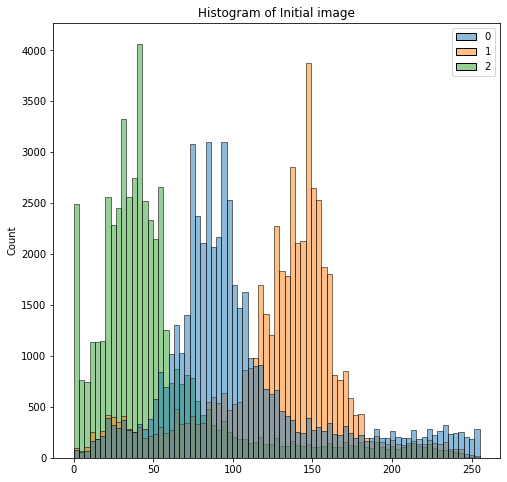

In [5]:
plt.figure(figsize = (8, 8))
sns.histplot(X)
plt.title("Histogram of Initial image")
plt.show()

**K-means with 5 cluster**

In [6]:
km = KMeans(n_clusters=5, init = "k-means++", max_iter=100)
km.fit(X)

KMeans(max_iter=100, n_clusters=5)

**Gán lại các pixel bằng centroid của cluster mà pixel đó thuộc về**

In [7]:
X_cmpresd = km.cluster_centers_[km.labels_]
X_cmpresd = np.clip(X_cmpresd.astype('uint8'), 0, 255)

In [8]:
km.cluster_centers_

array([[ 85.62609813, 136.24684885,  39.31889996],
       [213.56909621, 199.10553936, 188.26705539],
       [ 47.38458084,  48.74431138,  22.81347305],
       [192.3589145 , 109.59585643,   8.54128976],
       [127.56646825, 145.39310516,  86.0875496 ]])

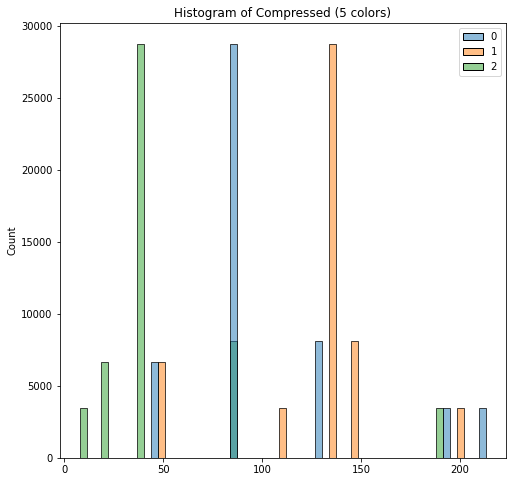

In [9]:
plt.figure(figsize = (8, 8))
sns.histplot(X_cmpresd)
plt.title("Histogram of Compressed (5 colors)")
plt.show()

**Trả lại kích thước ban đầu của ảnh và in ra ảnh nén**

In [10]:
X_cmpresd = X_cmpresd.reshape(img_size[0], img_size[1], img_size[2])

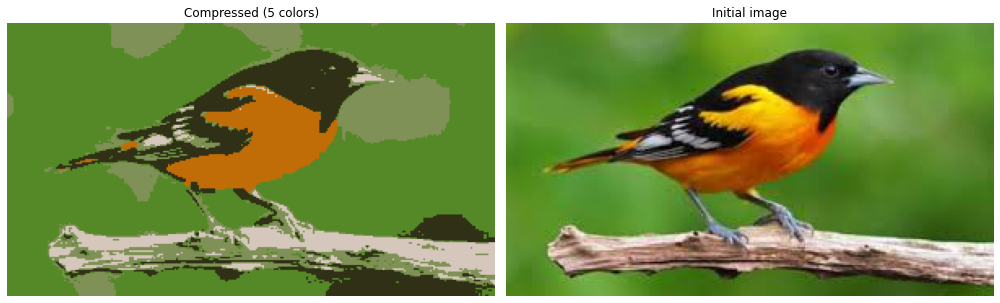

In [11]:
figre, axs = plt.subplots(1, 2, figsize = (14, 10))
axs[1].imshow(img)
axs[1].set_title('Initial image')
axs[0].imshow(X_cmpresd)
axs[0].set_title('Compressed (5 colors)')
for axs in figre.axes:
    axs.axis('off')
plt.tight_layout();

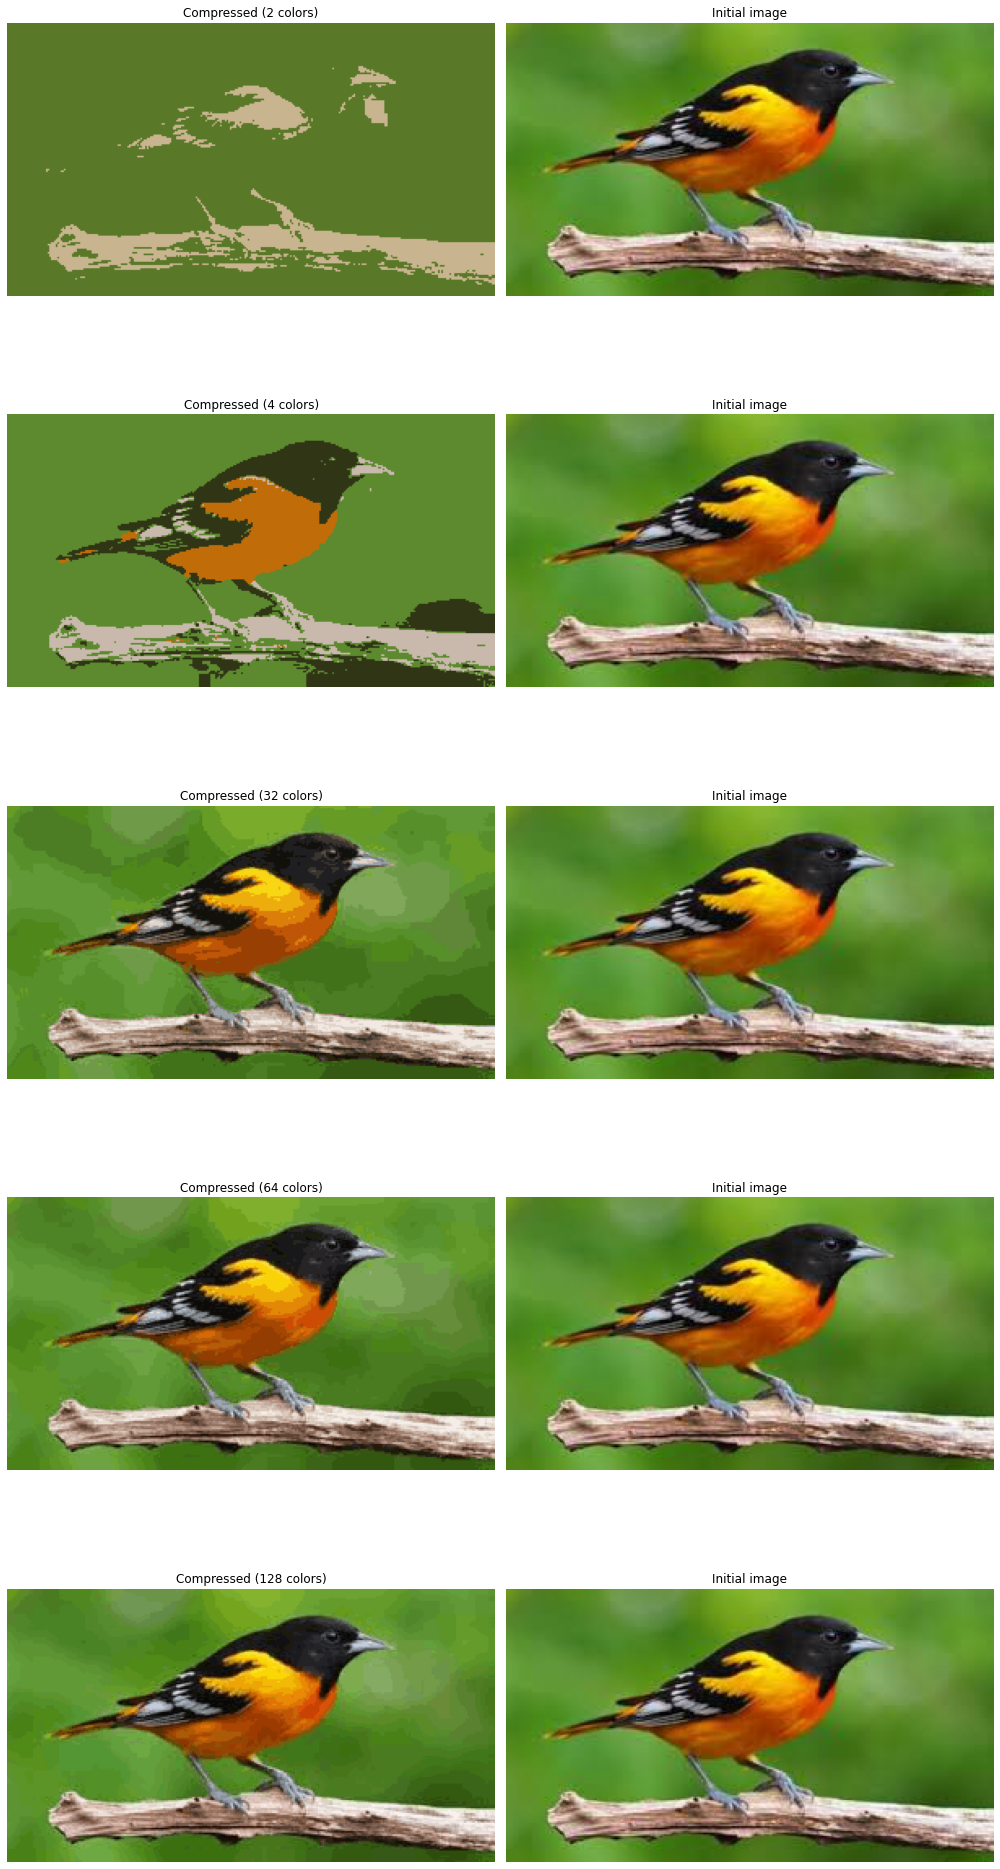

In [12]:
figre, axs = plt.subplots(5, 2, figsize = (14, 28))
k_ = [2, 4, 32, 64, 128]
for k, i in zip(k_, range(5)):
  X = img.reshape(img_size[0] * img_size[1], img_size[2])
  km = KMeans(n_clusters=k, init = "k-means++", max_iter=100)
  km.fit(X)
  X_cmpresd = km.cluster_centers_[km.labels_]
  X_cmpresd = np.clip(X_cmpresd.astype('uint8'), 0, 255)
  X_cmpresd = X_cmpresd.reshape(img_size[0], img_size[1], img_size[2])
  axs[i][0].imshow(X_cmpresd)
  axs[i][0].set_title('Compressed (' + str(k) + ' colors)')
  axs[i][0].axis('off')
  axs[i][1].imshow(img)
  axs[i][1].set_title('Initial image')
  axs[i][1].axis('off')
plt.tight_layout();